In [2]:
import pandas as pd
from collections import Counter, defaultdict
import re
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv("/home/aitech/ssd/Done-Talking/src/assets/diarization_output/Council meeting could change landscape of downtown Salt Lake City_diarization_20250501_130047.csv")


In [16]:
most_talked_speakers = data['speaker'].value_counts().nlargest(2).index.tolist()
print(type(most_talked_speakers))
print(most_talked_speakers)

total_duration_each_speaker = data.groupby('speaker')['duration'].sum().sort_values(ascending=False).to_dict()
print(type(total_duration_each_speaker))
print(total_duration_each_speaker)

#text = data['text'].tolist()
#print(text)

<class 'list'>
['SPEAKER_01', 'SPEAKER_02']
<class 'dict'>
{'SPEAKER_01': 90.68624999999996, 'SPEAKER_02': 41.630625, 'SPEAKER_00': 26.56125000000001}


In [25]:
all_text = ' '.join(data['text'].dropna()).lower()
words = re.findall(r'\b\w+\b', all_text)
print(type(words))
# Define stopwords
stop_words = set(stopwords.words('english'))

# Initialize
word_counts = Counter()
speaker_word_map = defaultdict(Counter)

# Process each row
for _, row in data.iterrows():
    text = str(row['text']).lower()
    speaker = row['speaker']
    words = re.findall(r'\b\w+\b', text)
    filtered_words = [w for w in words if w not in stop_words]
    
    word_counts.update(filtered_words)
    speaker_word_map[speaker].update(filtered_words)

# Most common word (excluding stopwords)
top_word, freq = word_counts.most_common(1)[0]
print(f"Most common word: '{top_word}' ({freq} times)")
print(type(top_word))
print(type(freq))

# Who said it
for speaker, counter in speaker_word_map.items():
    if top_word in counter:
        print(f"{speaker}: {counter[top_word]} times")

<class 'list'>
Most common word: 'city' (9 times)
<class 'str'>
<class 'int'>
SPEAKER_00: 1 times
SPEAKER_01: 8 times


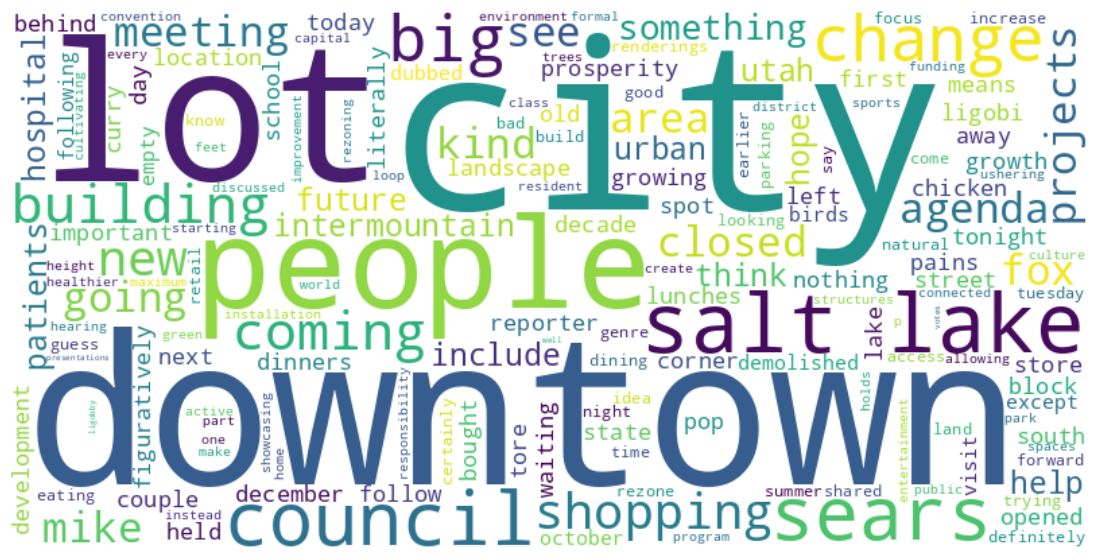

In [5]:
# Combine all text and clean
all_text = ' '.join(data['text'].dropna()).lower()
words = re.findall(r'\b\w+\b', all_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words]

# Re-join cleaned words
clean_text = ' '.join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

# Display it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()